In [2]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#
def Kmeans_manual(data:pd.DataFrame, K:int, epochs:int=100, tol:float=1e-4, random_state:int=None):
    history= []
    labels_hist = []

    np.random.seed(random_state)

    random_idx = np.random.permutation(data.shape[0])[:K]
    centroides = data[random_idx]

    for _ in range(epochs):
        history.append(centroides.copy())

        distancias = np.linalg.norm(data[:, np.newaxis] - centroides, axis=2)
        clases = np.argmin(distancias, axis=1)


        labels_hist.append(clases.copy())

        centroides_nuevos = np.array([data[clases == j].mean(axis=0) for j in range(K)])

        if np.all(np.linalg.norm(centroides_nuevos - centroides, axis=1) < tol):
            break

        centroides = centroides_nuevos

    #fin for
    history.append(centroides.copy())
    labels_hist.append(clases.copy())     

    return centroides, clases, history, labels_hist


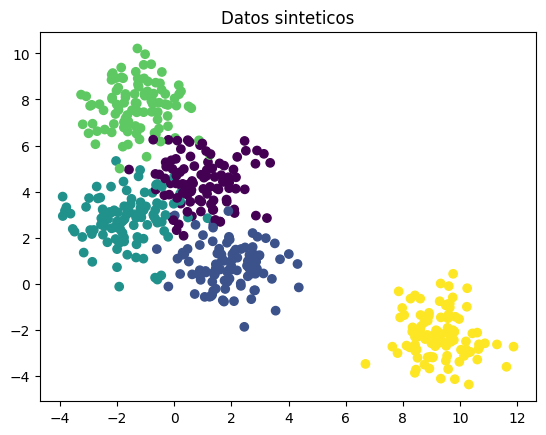

In [11]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=0)

plt.title("Datos sinteticos")
plt.scatter(X[..., 0], X[:, 1], c=y)
plt.show()

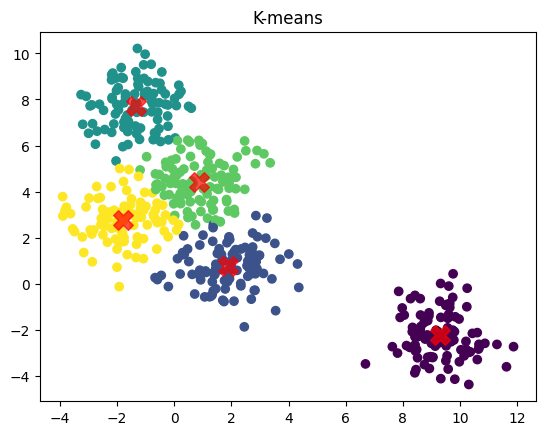

In [12]:
# Own K-means
centroides, clases, history, labels_hist = Kmeans_manual(X, 5, random_state=614)

# observamos resultados
plt.title("K-means")
plt.scatter(X[..., 0], X[:, 1], c=clases)
plt.scatter(centroides[:, 0], centroides[:, 1], c="r", s=200, alpha=0.7, marker="X")
plt.show()

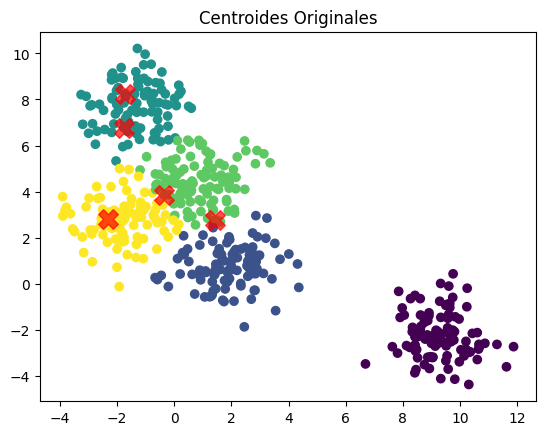

In [18]:
# observamos resultados
plt.title("Centroides Originales")
plt.scatter(X[..., 0], X[:, 1], c=clases)
plt.scatter(history[0][:, 0], history[0][:, 1], c="r", s=200, alpha=0.7, marker="X")
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


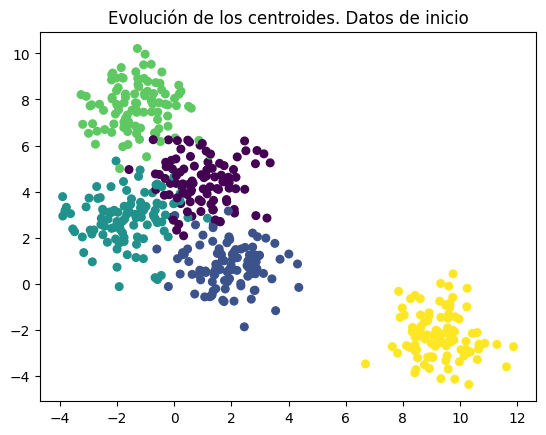

In [20]:
from matplotlib import animation

fig, ax = plt.subplots()

def init():
    ax.clear()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30)
    ax.set_title("Evolución de los centroides. Datos de inicio")

def update(frame):
    ax.clear()
    label = labels_hist[frame]
    ax.scatter(X[:, 0], X[:, 1], c=label, s=30)

    centros = history[frame]
    
    ax.scatter(centros[:, 0], centros[:, 1], c="r", s=100, alpha=0.7, marker="X")
    ax.set_title(f"Evolución de centroides Epoca: {frame+1}")

ani = animation.FuncAnimation(fig, update, frames=len(history), init_func=init, repeat=True, interval=400)
ani.save("K-means-evolución.gif")

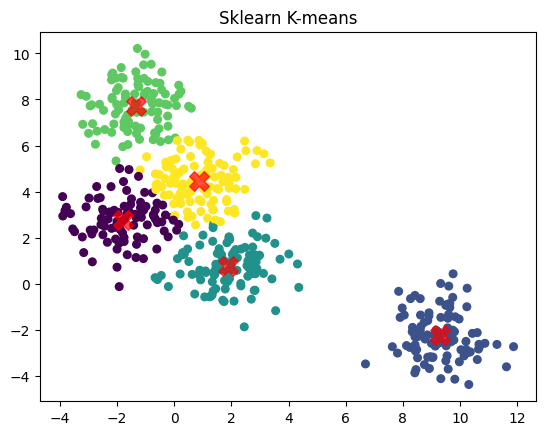

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=614)
y_pred = kmeans.fit_predict(X)

#
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="r", s=200, alpha=0.7, marker="X")
plt.title("Sklearn K-means")
plt.show()

**Mall_customers.csv**

In [23]:
df = pd.read_csv("./Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0.5, 1.0, 'Edad Vs Ingreso')

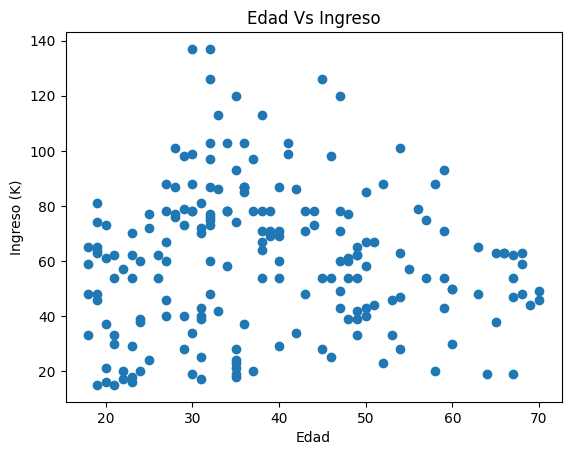

In [24]:
plt.scatter(df["Age"], df["Annual Income (k$)"])
plt.xlabel("Edad")
plt.ylabel("Ingreso (K)")
plt.title("Edad Vs Ingreso")

Text(0.5, 1.0, 'Ingreso vs Gastos')

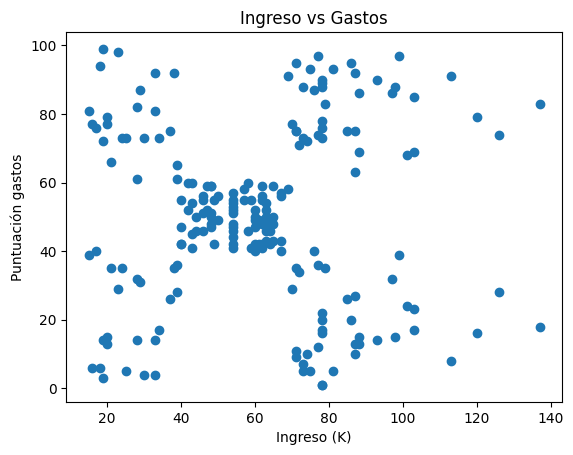

In [25]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Ingreso (K)")
plt.ylabel("Puntuación gastos")
plt.title("Ingreso vs Gastos")

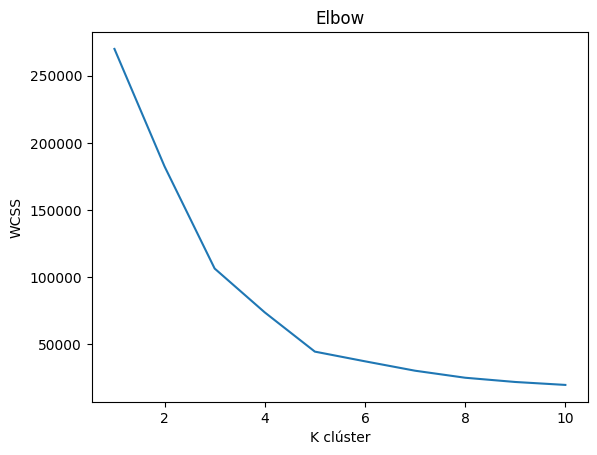

In [26]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

wcss = []

for i in range(11):
    if i != 0:
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=614)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        
# Graficamos
plt.plot(range(1, 11), wcss)
plt.title("Elbow")
plt.xlabel("K clúster")
plt.ylabel("WCSS")
plt.show()

Text(0.5, 1.0, 'Clústers -- Ingreso vs Gastos')

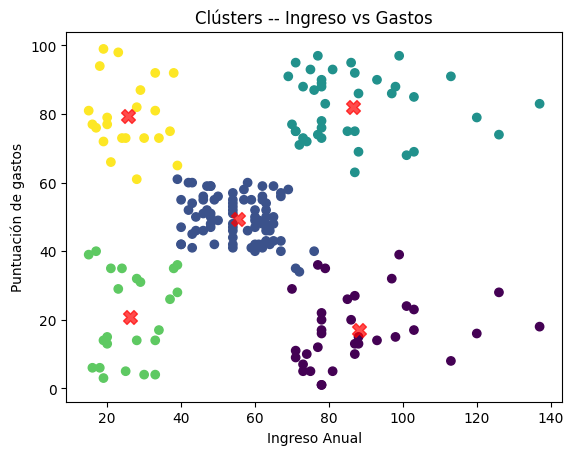

In [27]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=614)

y_pred = kmeans.fit_predict(X)

# gráficamos
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="r", s=100, alpha=0.7, marker="X")
plt.xlabel("Ingreso Anual")
plt.ylabel("Puntuación de gastos")
plt.title("Clústers -- Ingreso vs Gastos")


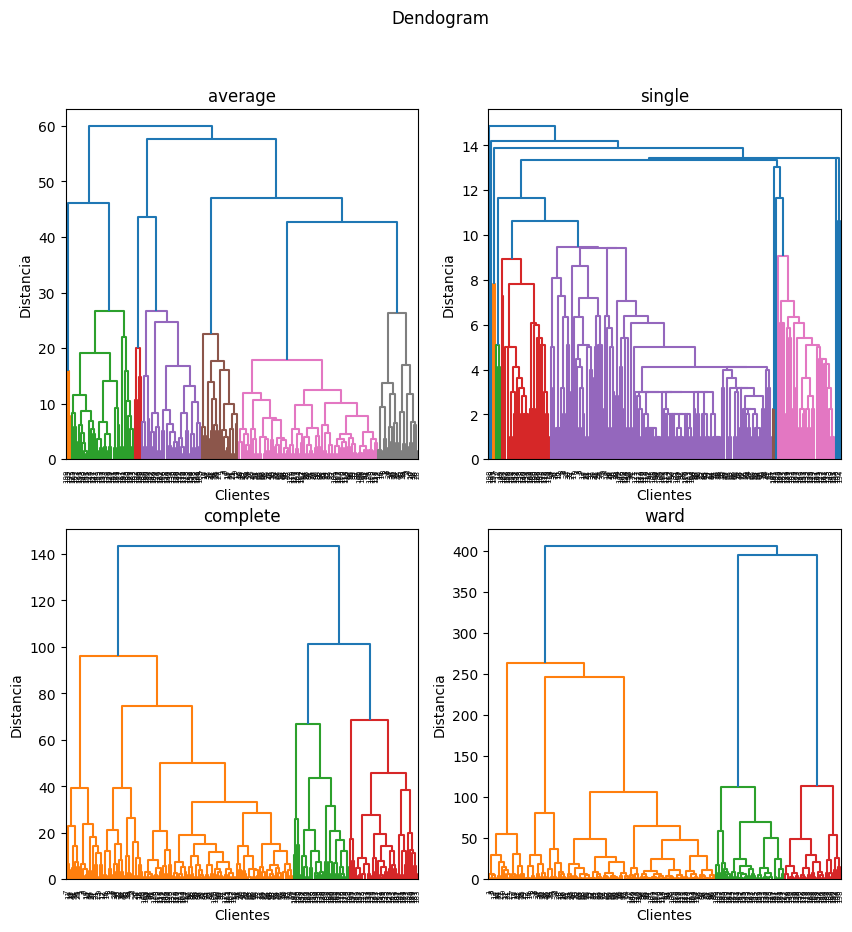

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Creamos los 4 dendogramas
methods = ["average", "single", "complete", "ward"]

plt.figure(figsize=(10, 10))
plt.suptitle("Dendogram")

for index, method in enumerate(methods):
    plt.subplot(2, 2, index+1)
    
    graph = dendrogram(linkage(X, method=method))
    plt.title(method)
    plt.xlabel("Clientes")
    plt.ylabel("Distancia")

Text(0.5, 1.0, 'Clústers -- Ingreso vs Gastos ~ # Clústers: 5')

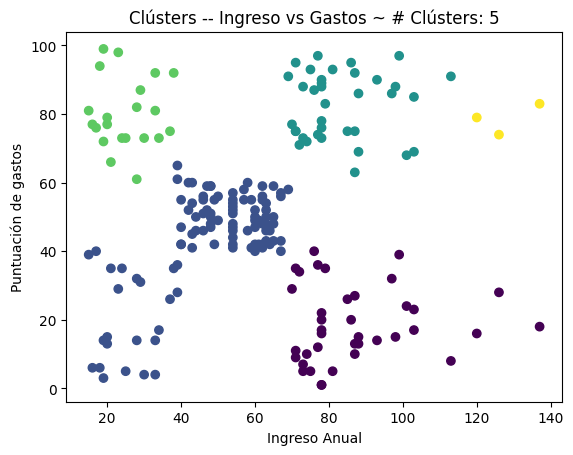

In [29]:
from sklearn.cluster import AgglomerativeClustering


clust = AgglomerativeClustering(n_clusters=5, linkage="average")
y_pred = clust.fit_predict(X)

# gráficamos
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=y_pred)
plt.xlabel("Ingreso Anual")
plt.ylabel("Puntuación de gastos")
plt.title(f"Clústers -- Ingreso vs Gastos ~ # Clústers: {clust.n_clusters_}")



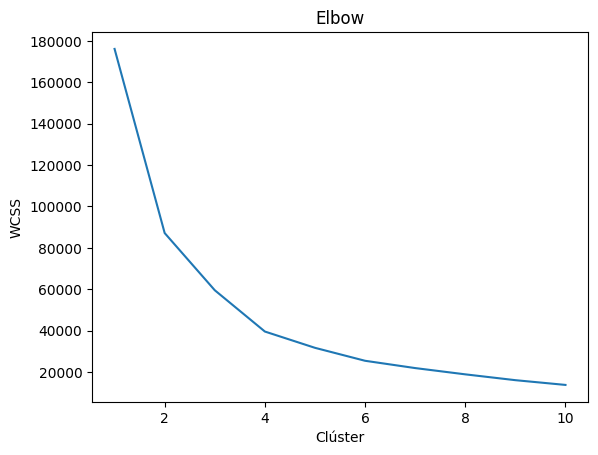

In [30]:
X = df[["Age", "Annual Income (k$)"]]

wcss = []

for i in range(11):
    if i != 0:
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=614)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        

# Observamos
plt.plot(range(1, 11), wcss)
plt.title("Elbow")
plt.xlabel("Clúster")
plt.ylabel("WCSS")
plt.show()

Text(0.5, 1.0, 'Ingreso vs Edad')

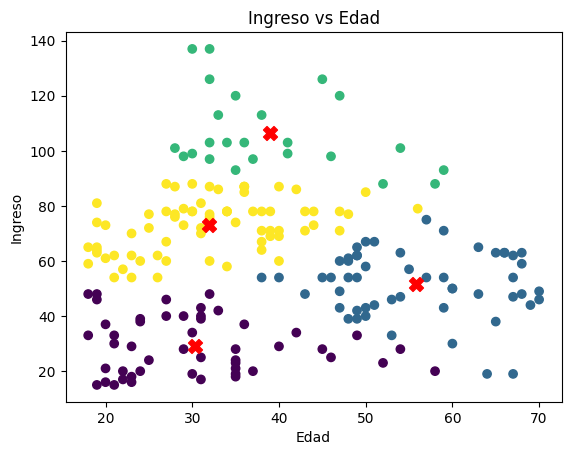

In [31]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=614)
y_pred = kmeans.fit_predict(X)

plt.scatter(df["Age"], df["Annual Income (k$)"], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="r", s=100, marker="X")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.title("Ingreso vs Edad")

Text(0, 0.5, 'Distancia Euclídea')

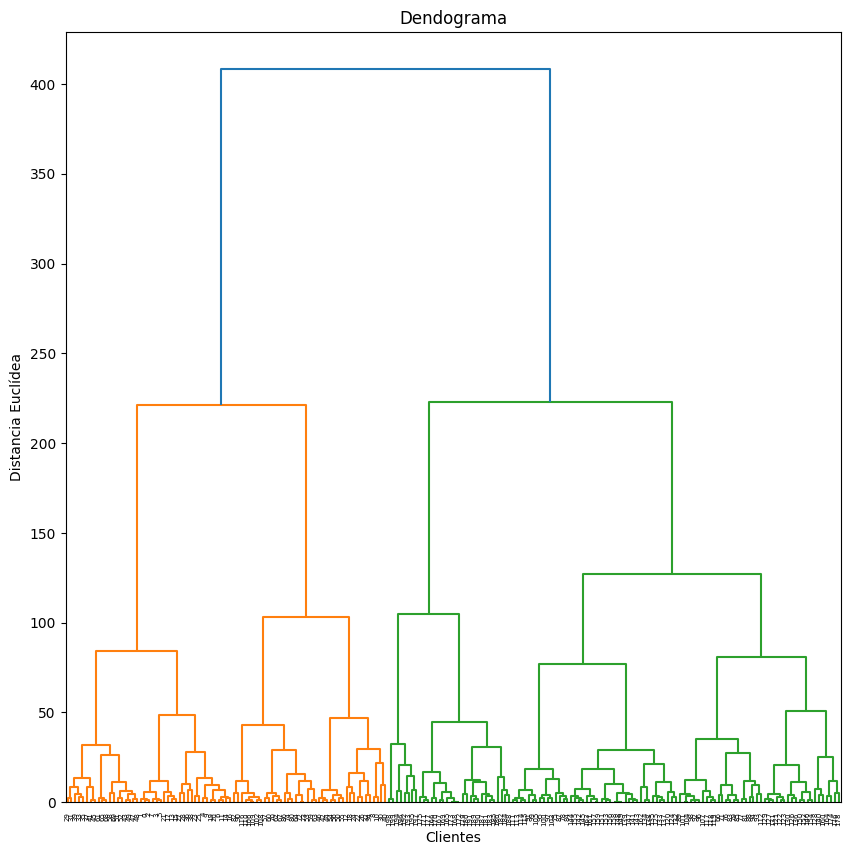

In [32]:
plt.figure(figsize=(10, 10))

graph = dendrogram(linkage(X, method="ward"))
plt.title("Dendograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")

C:\Users\07020\AppData\Local\Temp\ipykernel_20976\638364691.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Ingreso anual vs Edad')

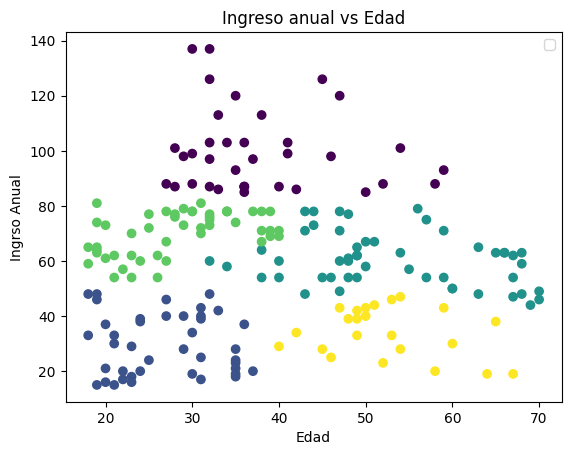

In [33]:
# Creamos el clústering con sk-learn
from sklearn.cluster import AgglomerativeClustering


clust = AgglomerativeClustering(n_clusters=5, linkage="complete")
y_pred = clust.fit_predict(X)

plt.scatter(df["Age"], df["Annual Income (k$)"], c=y_pred)
plt.xlabel("Edad")
plt.ylabel("Ingrso Anual")
plt.legend()
plt.title("Ingreso anual vs Edad")